<a href="https://colab.research.google.com/github/AliaF123/AliaF123/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Fraud Detection project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

In [4]:
bank_df = pd.read_csv("../content/Transactions_Data.csv")

In [5]:
# to see the number of rows and coloumns
bank_df.shape

(423045, 11)

In [6]:
#bank_card.head() # by default shows 5 entries
bank_df.head(12)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0.0,0.0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0.0,0.0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0.0,0.0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0.0,0.0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0.0,0.0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0.0,0.0


In [7]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423045 entries, 0 to 423044
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            423045 non-null  int64  
 1   type            423045 non-null  object 
 2   amount          423045 non-null  float64
 3   nameOrig        423045 non-null  object 
 4   oldbalanceOrg   423044 non-null  float64
 5   newbalanceOrig  423044 non-null  float64
 6   nameDest        423044 non-null  object 
 7   oldbalanceDest  423044 non-null  float64
 8   newbalanceDest  423044 non-null  float64
 9   isFraud         423044 non-null  float64
 10  isFlaggedFraud  423044 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 35.5+ MB


In [8]:
bank_df.drop(['isFlaggedFraud', 'nameDest', 'nameOrig'], axis=1, inplace=True)


In [9]:
bank_df['isFraud'].value_counts()


,count
isFraud,
0.0,422827
1.0,217


In [10]:
bank_df['type'].value_counts()

,count
type,
CASH_OUT,152756
PAYMENT,140697
CASH_IN,91629
TRANSFER,34931
DEBIT,3032


In [11]:

# Create a LabelEncoder object
le = LabelEncoder()
bank_df['type'] = le.fit_transform(bank_df['type'])

# Check the result
print(bank_df.head())
bank_df.describe()

   step  type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1     3   9839.64       170136.0       160296.36             0.0   
1     1     3   1864.28        21249.0        19384.72             0.0   
2     1     4    181.00          181.0            0.00             0.0   
3     1     1    181.00          181.0            0.00         21182.0   
4     1     3  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  isFraud  
0             0.0      0.0  
1             0.0      0.0  
2             0.0      1.0  
3             0.0      1.0  
4             0.0      0.0  


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,423045.000000,423045.000000,4.230450e+05,4.230440e+05,4.230440e+05,4.230440e+05,4.230440e+05,423044.000000
mean,13.005207,1.703448,1.715082e+05,9.016937e+05,9.212669e+05,9.839946e+05,1.177147e+06,0.000513
std,3.335075,1.342530,2.828329e+05,2.962515e+06,2.999694e+06,2.349545e+06,2.539244e+06,0.022643
min,1.000000,0.000000,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,10.000000,1.000000,1.349810e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,13.000000,1.000000,8.193778e+04,1.827250e+04,0.000000e+00,1.084914e+05,2.179228e+05,0.000000
75%,16.000000,3.000000,2.286095e+05,1.729825e+05,2.144470e+05,8.893285e+05,1.218573e+06,0.000000
max,18.000000,4.000000,1.000000e+07,3.893942e+07,3.894623e+07,4.148270e+07,4.148270e+07,1.000000


In [12]:
print("\n Missing Values")
print(bank_df.isnull().sum())


 Missing Values
step              0
type              0
amount            0
oldbalanceOrg     1
newbalanceOrig    1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
dtype: int64


In [13]:
bank_df.fillna({
    'nameDest': 'unknown',
    'newbalanceOrig': bank_df['oldbalanceOrg'] - bank_df['amount'],
    'oldbalanceDest': bank_df['newbalanceDest'] - bank_df['amount'],
    'newbalanceDest': bank_df['oldbalanceDest'] + bank_df['amount'],
    'isFraud': 0,
    'isFlaggedFraud': 0
}, inplace=True)


In [14]:
bank_df.fillna(0, inplace=True)

In [15]:
print(bank_df.isnull().sum().sort_values(ascending=False))

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64


In [16]:
# Select features and target variable
bank_df['balance_diff'] = bank_df['oldbalanceOrg'] - bank_df['newbalanceOrig']
bank_df['dest_balance_change'] = bank_df['newbalanceDest'] - bank_df['oldbalanceDest']
bank_df['sent_more_than_available'] = (bank_df['amount'] > bank_df['oldbalanceOrg']).astype(int)

In [18]:
from sklearn.preprocessing import StandardScaler

# Select features
features = ['amount', 'balance_diff', 'dest_balance_change', 'sent_more_than_available']
X = bank_df[features]

# Check for null values before scaling
assert X.isnull().sum().sum() == 0, "Feature Metrics still contains NaN values before scaling."

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
#Library
from sklearn.cluster import KMeans

In [20]:
#K-means Clustering
kmeans = KMeans(n_clusters=6, random_state=42)
bank_df['cluster'] = kmeans.fit_predict(X_scaled)

In [21]:
#Visual Evaluation of cluster for fraud patterns we have to identify clusters
fraud_by_cluster = bank_df.groupby('cluster')['isFraud'].mean().sort_values(ascending=False)
print(fraud_by_cluster)

cluster
2    0.006097
0    0.001107
5    0.000556
1    0.000047
3    0.000000
4    0.000000
Name: isFraud, dtype: float64


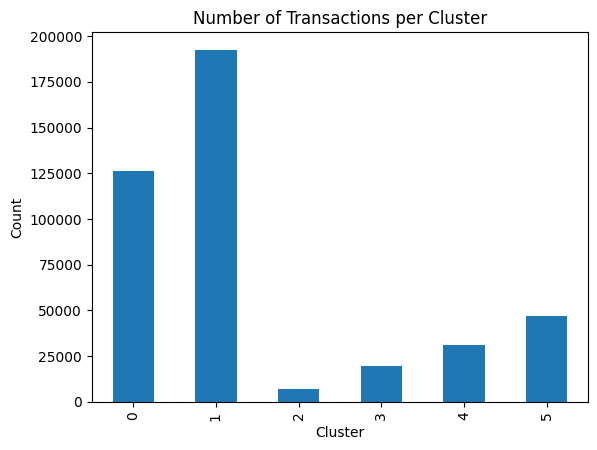

In [22]:
#Count transactions in each clusters
bank_df['cluster'].value_counts().sort_index().plot(kind='bar')
plt.title("Number of Transactions per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-23-4058460228.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_fraud_rate.index, y=cluster_fraud_rate.values, palette='coolwarm')


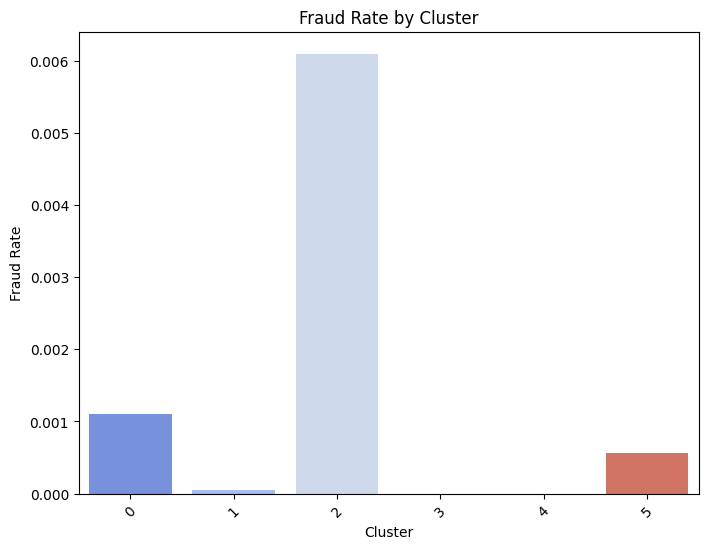

In [23]:
# Calculate the fraud rate in each cluster
cluster_fraud_rate = bank_df.groupby('cluster')['isFraud'].mean().sort_values(ascending=False)

# Plot the fraud rate for each cluster
plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_fraud_rate.index, y=cluster_fraud_rate.values, palette='coolwarm')
plt.title('Fraud Rate by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=45)
plt.show()

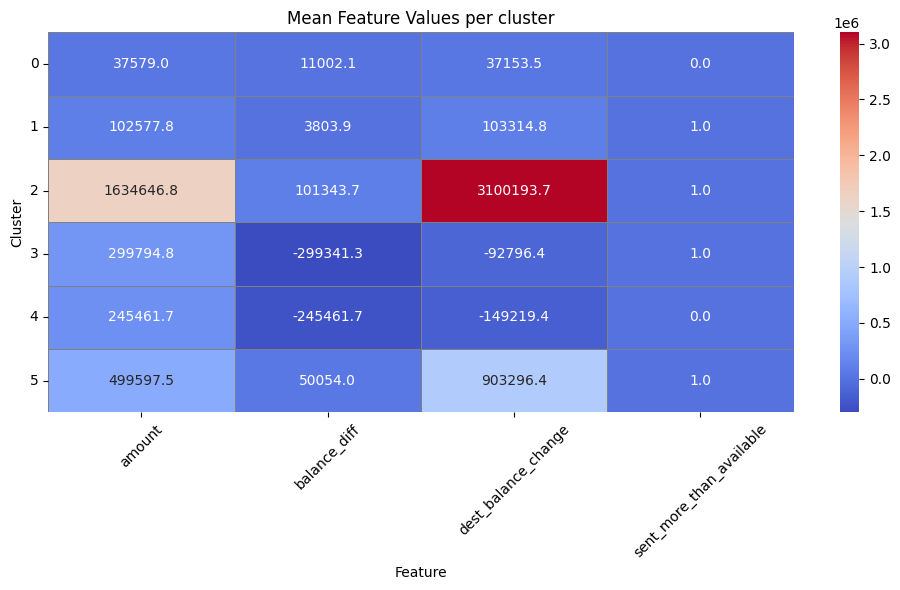

In [24]:

#Heatmap for mean feature value cluster
import seaborn as sns
import matplotlib.pyplot as plt
Cluster_summary = bank_df.groupby('cluster')[features].mean()
plt.figure(figsize=(10, 6))
sns.heatmap(Cluster_summary, annot=True, fmt=".1f", cmap='coolwarm',
linewidth=0.5,linecolor='grey')
plt.title("Mean Feature Values per cluster")
plt.ylabel("Cluster")
plt.xlabel("Feature")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

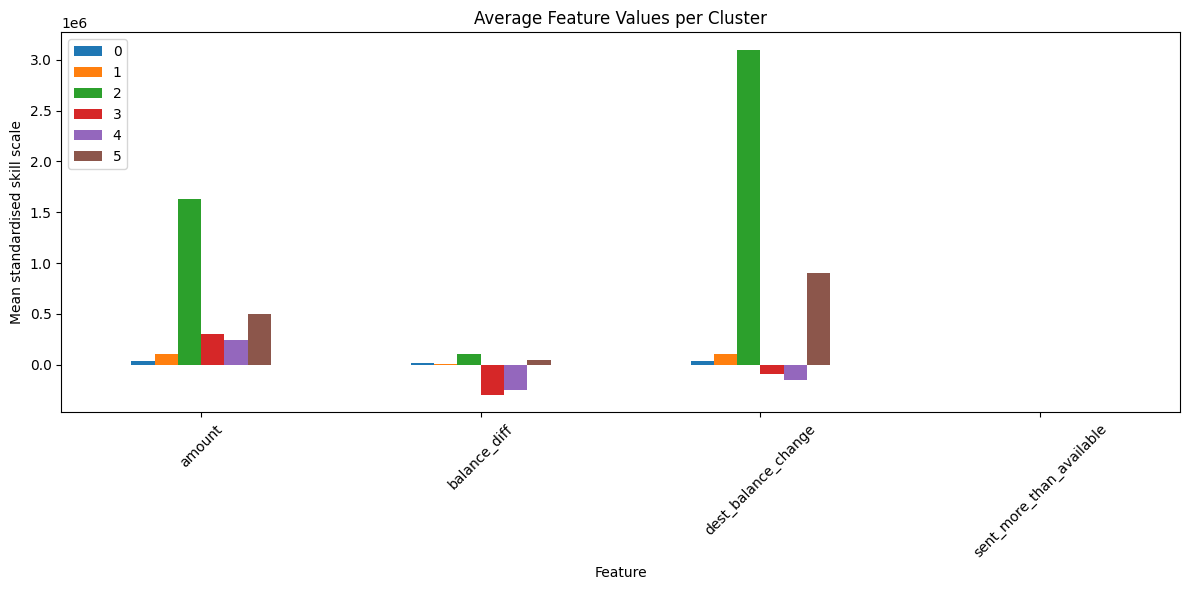

In [25]:
#Grouped barplot
Cluster_summary.T.plot(kind='bar', figsize=(12, 6))
plt.title("Average Feature Values per Cluster")
plt.ylabel("Mean standardised skill scale")
plt.xlabel("Feature")
plt.xticks(rotation=45)
plt.legend(loc='upper left')
bbox_to_anchor=(1.05, 1)
plt.tight_layout()
plt.show()

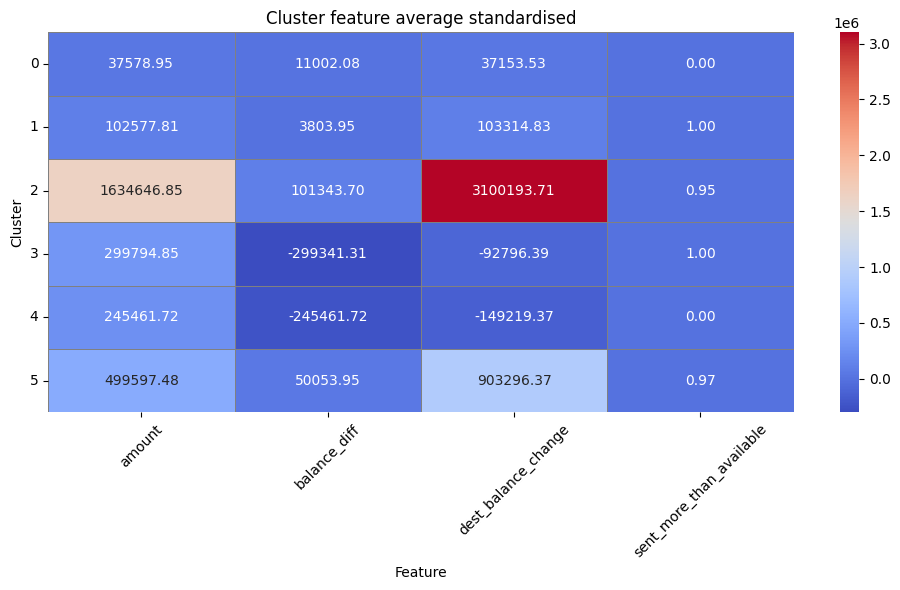

In [26]:
#Heatmap comparison
plt.figure(figsize=(10, 6))
sns.heatmap(Cluster_summary, annot=True, fmt=".2f", cmap='coolwarm',
linewidth=0.5,linecolor='grey')
plt.title("Cluster feature average standardised")
plt.xlabel("Feature")
plt.ylabel("Cluster")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

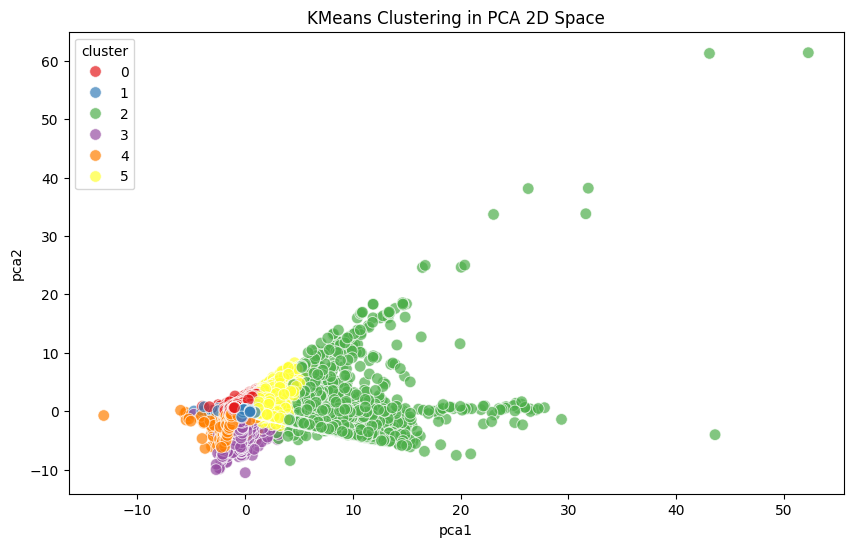

In [27]:
from sklearn.decomposition import PCA

# Apply PCA to reduce the feature space to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA components to the dataframe
bank_df['pca1'] = X_pca[:, 0]
bank_df['pca2'] = X_pca[:, 1]

# Plot clusters in PCA space
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', palette='Set1', data=bank_df, s=70, alpha=0.7)
plt.title('KMeans Clustering in PCA 2D Space')
plt.show()

#Alternative to PCA for clustering visuals
 **t-SNE **

In [28]:
#Libraries
from sklearn.manifold import TSNE

In [ ]:
#Clustering visual

tsne = TSNE(n_components=2, perplexity=50, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

bank_df['tsne1'] = X_tsne[:, 0]
bank_df['tsne2'] = X_tsne[:, 1]

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tsne1', y='tsne2', hue='cluster', palette='tab10', data=df)
plt.title("t-SNE Projection of Clusters")
plt.show()

Pairplot for selected features by cluster: it shows the differ across combinations of variables

In [ ]:
# Variables
sns.pairplot(bank_df, vars=['amount', 'balance_diff', 'dest_balance_change'], hue='cluster')


**Cluster size breakdown:** it will show how features relate to each other and to fraud

In [ ]:
bank_df['cluster'].value_counts().sort_index().plot(kind='bar')
plt.title("Number of Transactions per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()


Heatmap of cluster Feature averages: it helps compare clusters side-by-side

In [ ]:
cluster_summary = bank_df.groupby('cluster')[features].mean()
sns.heatmap(cluster_summary, annot=True, fmt=".1f", cmap='coolwarm')
plt.title("Cluster Feature Means")
plt.show()

Clusters as a new feature in Supervised Learning: the new column for the model

In [ ]:
# # Use this new column for training a classifier model
# bank_df['cluster'] = kmeans.labels_